In [246]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings("ignore")

# 연령별 인구대비 사망자 비율
age_deceased = pd.Series(name = 'age_deceased')
# 연령별 인구대비 확진자 비율
age_confirmed = pd.Series(name = 'age_confirmed')
# 연령별 확진자대비 사망자 비율
age_deceased_by_confirmed = pd.Series(name = 'age_deceased_by_confirmed')

# 연령별 사망자, 확진자 수 
time_age = pd.read_csv(r'./data/TimeAge.csv')
time_age = time_age[['deceased', 'confirmed']].groupby(time_age['age']).sum()

# 연령별 2020년 8월 기준 총 인구
age_band_all_people = pd.DataFrame()
all_people_age = pd.read_csv(r'./data/all_people_by_age.csv', encoding = 'utf-8')

for i in range(9):
    i *= 10
    age_band_all_people[f'{i}s'] = all_people_age[f'2020년08월_계_{i}~{i+9}세']
    
age_band_all_people  = age_band_all_people.iloc[0,:]

for i in range(age_band_all_people.shape[0]):
    age_band_all_people[i] = age_band_all_people[i].replace(',','') 

# str 타입을 float 타입으로 casting
time_age = time_age.astype(float)
age_band_all_people = age_band_all_people.astype(float)

for i in range(age_band_all_people.shape[0]):
    age_deceased[f'{i*10}s'] = np.divide(time_age.deceased[i],age_band_all_people[i]).round(5)
    age_confirmed[f'{i*10}s'] = np.divide(time_age.confirmed[i],age_band_all_people[i]).round(5)
    age_deceased_by_confirmed[f'{i*10}s'] = np.divide(time_age.deceased[i],time_age.confirmed[i]).round(5)
    
# print(age_deceased)
# print(age_confirmed)
# print(age_deceased_by_confirmed)

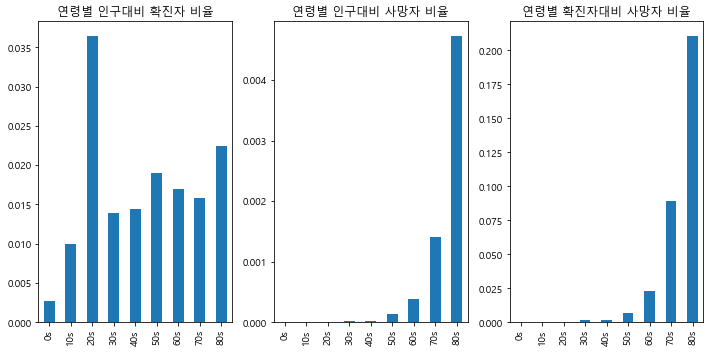

In [245]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize = (10,5))

age_confirmed.plot.bar(ax = ax[0])
ax[0].set_title("연령별 인구대비 확진자 비율")

age_deceased.plot.bar(ax = ax[1])
ax[1].set_title("연령별 인구대비 사망자 비율")

age_deceased_by_confirmed.plot.bar(ax = ax[2])
ax[2].set_title("연령별 확진자대비 사망자 비율")

fig.tight_layout() # 그래프 겹침 방지
plt.show()
